# Projet intégrateur - Classification

##  Preparation et utilisation d'un modele

* Chargement du fichier sur les prets bancaires

In [1]:
import pandas
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
import pickle#manip fichier python
#charger le fichier
df = pandas.read_csv("train_loan.csv")


* Affichage des 10 premieres lignes

In [2]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


* SHAPE

In [86]:
df.shape

(614, 13)

* Statistiques descriptives

In [52]:
#Sommaire des variables numériques
df.describe()
#Verifier le count pour chacun des attributs

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


* Observations générales

In [87]:
#LoanAmount dispose de (614 – 592) 22 missing values.
#Loan_Amount_Term dispose de (614 – 600) 14 missing values.
#Credit_History dispose (614 – 564) 50 missing values.
#Credit_History est soit 0 ou 1.  84% des demandeurs ont un historique

* Distribution de probabilité pour les variables de prédiction

In [4]:
#plot des dist de prob variables avec le module seaborn (voir matplotlib)
#import du module
import seaborn as sns 
%matplotlib inline

* Distribution pour une des variables: ApplicantIncome

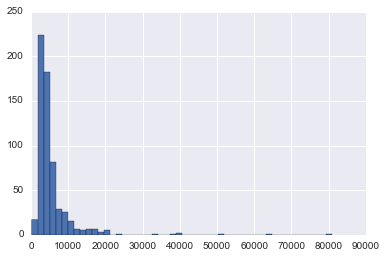

In [88]:
df['ApplicantIncome'].hist(bins=50)

* Ajout du tracé KDE 

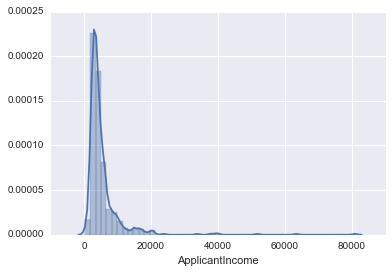

In [89]:
#KDE en meme temps
attr = df['ApplicantIncome']
sns.distplot(attr)
#Important: On oberve des outliers vers la droite

* Utilisation du boxplot pour identifier les outliers ou valeurs extremes

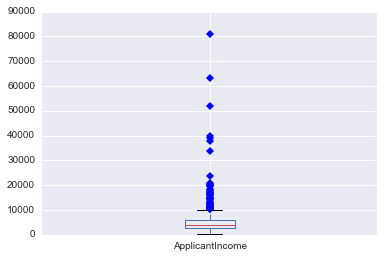

In [90]:
#Box plot pour identifier les valeurs extremes et la distribution des valeurs
df.boxplot(column='ApplicantIncome', sym='gD',return_type='axes')
#remarque: bcp d'outliers

* Ségregation par sexe

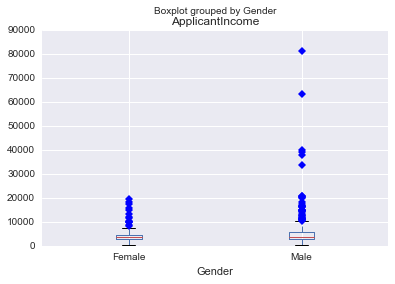

In [58]:
df.boxplot(column='ApplicantIncome',sym='gD', by = 'Gender')
#remarque: bcp d'outliers du coté des Males

* Exploration d'une autre variable de prédiction

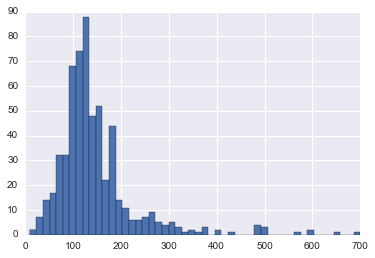

In [91]:
#On verifie la meme chose avec LoanAmount
loanAmount = df['LoanAmount'].hist(bins=50)
#sns.distplot(loanAmount)# cause un prob car NaN est present
#remarque: bcp d'outliers

* Boxplot pour identifier les valeurs extremes

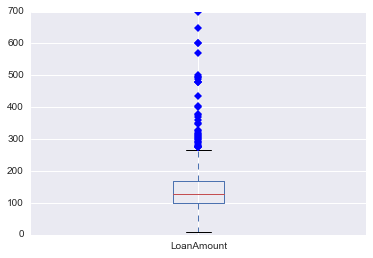

In [92]:
#box plot
df.boxplot(column='LoanAmount',sym='gD', return_type='axes')
#remarque: bcp d.outliers

# Analyse des variables catégorielles

In [61]:

#On prend l'Exemple de l'attribut credit_history
#voir: http://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print 'Table des Frequence pour Credit History:' 
print temp1

print '\nProbabilité d\'obtenir un pret pour chaque Credit History:' 
print temp2
#Remarquer les plots ci-dessous

Table des Frequence pour Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probabilité d'obtenir un pret pour chaque Credit History:
Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64


* Remarque: la probabilité d'avoir un pret est de 79.6 pour un demandeur qui a un historique de crédit !

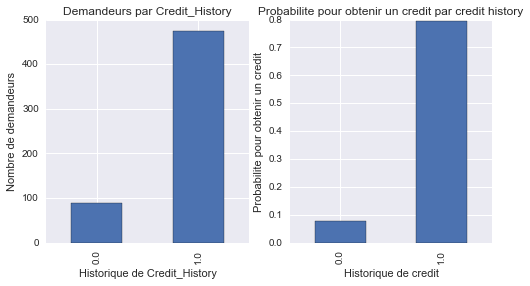

In [62]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Historique de Credit_History')
ax1.set_ylabel('Nombre de demandeurs')
ax1.set_title("Demandeurs par Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Historique de credit')
ax2.set_ylabel('Probabilite pour obtenir un credit')
ax2.set_title("Probabilite pour obtenir un credit par credit history")

# Nettoyage de données

* Il y'a un certain nombre de valeurs manquantes au niveau des variables de prédiction. 
* Est ce qu'on doit éliminer les lignes ou procéder au remplacement. Cela va dépendre de l'importance des variables.
* Au niveau des distributions,  ApplicantIncome et LoanAmount contiennent des outliers. On va essayer de réduire leur importance.

* Déterminer les valeurs manquantes pour chaque attribut

In [63]:
#Utiliser une fonction lambda
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

* Probleme des outliers

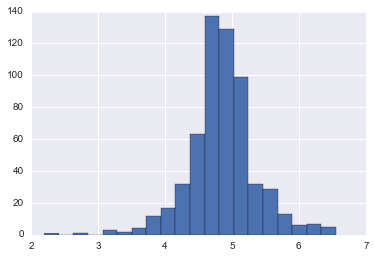

In [64]:
#LoanAmount contient des valeurs extremes qui peuvent etre justifiées. On fera en sorte de diminuer leur impact
#voir: http://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/
import numpy as np
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)
#On remarque que la distribution est bcp plus vers normale-gauss avec la transformation que l'on vient d'introduitre

# Développement de modèle

* On procède à l'apprentissage de 3 modeles que l'on va comparer par la suite

* Encodage des attributs catégoriels

In [65]:
 from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes
#Visualiser une variable exemple en sortie
#df['Married']
df['Self_Employed']

0      1
1      1
2      2
3      1
4      1
5      2
6      1
7      1
8      1
9      1
10     1
11     0
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     0
20     1
21     1
22     1
23     1
24     0
25     2
26     1
27     1
28     1
29     0
      ..
584    1
585    1
586    1
587    1
588    1
589    2
590    1
591    2
592    2
593    1
594    2
595    1
596    2
597    1
598    2
599    1
600    0
601    0
602    1
603    1
604    1
605    1
606    1
607    1
608    1
609    1
610    1
611    1
612    1
613    2
Name: Self_Employed, dtype: int64

# Fonction pour le modele


* On développe une fonction permettant l'apprentissage et le calcul des metriques'
* voir: http://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/

In [66]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print "Accuracy : %s" % "{0:.3%}".format(accuracy)

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print "Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error))

  #Fit the model again so that it can be refered outside the function:
  #model.fit(data[predictors],data[outcome]) 

# Utilisation et comparaison de differents modeles

* Application du modele Logistic regression

In [67]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['ApplicantIncome']
#Remplacer les valeurs manquantes sur Credit_History
df['Credit_History'].fillna(0, inplace=True)# remplacer par zero ???
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 68.730%
Cross-Validation Score : 68.729%


* Decision tree

In [95]:
model_dt = DecisionTreeClassifier()
#predictor_var = ['Credit_History','Gender','Married','Education']
predictor_var = ['ApplicantIncome']
classification_model(model_dt, df,predictor_var,outcome_var)

Accuracy : 93.648%
Cross-Validation Score : 56.026%


* K Nearest neighbor

In [69]:
from sklearn import neighbors
#KNN avec K=10
model_knn = neighbors.KNeighborsClassifier(10,weights='uniform')
#predictor_var = ['Credit_History','Gender','Married','Education']
predictor_var = ['ApplicantIncome']
classification_model(model_knn, df,predictor_var,outcome_var)

Accuracy : 69.381%
Cross-Validation Score : 61.244%


# Sauvegarde du modele KNN

In [74]:
# sauvegarder le modele
model_knn = neighbors.KNeighborsClassifier(10,weights='uniform')
#Fit the model:
model_knn.fit(df[predictor_var],df[outcome_var])
  

filename = 'knn_model.sav'
pickle.dump(model_knn, open(filename, 'wb'))
print "sauvegarde du modele terminée !"

sauvegarde du modele terminée !


# Utilisation du modele KNN pour la prédiction

In [98]:
from Tkinter import *


def quit():
    root.destroy()

def main_calcul():
    outcome_var = 'Loan_Status'
    predictor_var = np.array([4388]).reshape((len([3000]), 1))
    # Charger le modele 
    loaded_model = pickle.load(open(filename, 'rb'))
    #Make predictions on values:
    result = loaded_model.predict(predictor_var)
    print(result)
    #decision.config(text="{0:5.2f}".format(result))

def enregistrer():
    pass
    #personne=Bmi(nom.get(),int(age.get()),float(poids.get()),float(taille.get()))
    #enregistrer_bmi("bmi_annuel.csv", personne)


root=Tk()
root.title("Calcul de l'indice de masse corporelle")
root.geometry("580x450")


mainFrame=Frame(root)

#titre écran
rootfont=('arial', 20, 'bold')
label = Label(mainFrame, text='Saisie des données Patient', font=rootfont)
label.config(height=2, width=40)
label.grid(row=1, column=1)

#section de saisie
bodyFrame=Frame(mainFrame)
Label(bodyFrame, text='Sexe').grid(row=1, column=1, sticky=W)
Label(bodyFrame, text='Statut').grid(row=2, column=1, sticky=W)
Label(bodyFrame, text='Nombre de dépendents' ).grid(row=3, column=1, sticky=W)
Label(bodyFrame, text='Formation' ).grid(row=4, column=1, sticky=W)
Label(bodyFrame, text='Statut emploi' ).grid(row=5, column=1, sticky=W)
Label(bodyFrame, text='Revenu personnel' ).grid(row=6, column=1, sticky=W)
Label(bodyFrame, text='Revenu garant' ).grid(row=7, column=1, sticky=W)
Label(bodyFrame, text='Montant pret' ).grid(row=8, column=1, sticky=W)
Label(bodyFrame, text='Durée' ).grid(row=9, column=1, sticky=W)
Label(bodyFrame, text='Historique credit' ).grid(row=10, column=1, sticky=W)
Label(bodyFrame, text='Surface propriété' ).grid(row=11, column=1, sticky=W)

Label(bodyFrame, text='Décision' ).grid(row=12, column=1, sticky=W)
#Label(bodyFrame, text='Risque de santé' ).grid(row=6, column=1, sticky=W)

sexe   =Entry(bodyFrame, width=60 )
sexe.grid(row=1, column=2, columnspan=4, sticky=W)
statut   =Entry(bodyFrame, width=20 )
statut.grid(row=2, column=2, columnspan=4, sticky=W)
dependent=Entry(bodyFrame, width=20 )
dependent.grid(row=3, column=2, columnspan=4, sticky=W)
formation=Entry(bodyFrame, width=20 )
formation.grid(row=4, column=2, columnspan=4, sticky=W)
emploi=Entry(bodyFrame, width=40 )
emploi.grid(row=5, column=2, sticky=W)

revenu=Entry(bodyFrame, width=40 )
revenu.grid(row=6, column=2, sticky=W)

garant=Entry(bodyFrame, width=40 )
garant.grid(row=7, column=2, sticky=W)
montant=Entry(bodyFrame, width=40 )
montant.grid(row=8, column=2, sticky=W)

duree=Entry(bodyFrame, width=40 )
duree.grid(row=9, column=2, sticky=W)

credit=Entry(bodyFrame, width=40 )
credit.grid(row=10, column=2, sticky=W)

properte=Entry(bodyFrame, width=40 )
properte.grid(row=11, column=2, sticky=W)

sexe = "Male"
statut = "Yes"
dependent = 1
formation = "Graduate"
emploi = "No"
revenu = 4583
garant=1508.0
montant=128.0
credit= 1.0
properte = "Rural"
duree = 360 
decision=Label(bodyFrame, width=50 ).grid(row=12, column=2, columnspan=4, sticky=W)

#boutons
bodyFrame.grid(row=2, column=1, sticky=W)

buttonFrame=Frame(mainFrame, padx=5, pady=5)
ok= Button(buttonFrame, text='Evaluer',  command=main_calcul).grid(row=1, column=1,pady=5, padx=5,ipady=5, ipadx=15 )
enregistrer= Button(buttonFrame, text='Enregistrer',  command=enregistrer).grid(row=1, column=2,pady=5, padx=5,ipady=5, ipadx=15)
cancel= Button(buttonFrame, text='Quitter',     command=quit).grid(row=1, column=3,pady=5, padx=5,ipady=5, ipadx=15)
buttonFrame.grid(row=3, column=1)


mainFrame.grid(row=1, column=1 )
root.mainloop()

In [ ]:
print "Fin du projet"